# House Price Prediction

### Libraries Imported 

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from category_encoders import MEstimateEncoder
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset 

In [111]:
house_data = pd.read_csv("C:/Users/User/Downloads/House Price Prediction/data.csv")

In [112]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [113]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Visualizing distribution of Price 

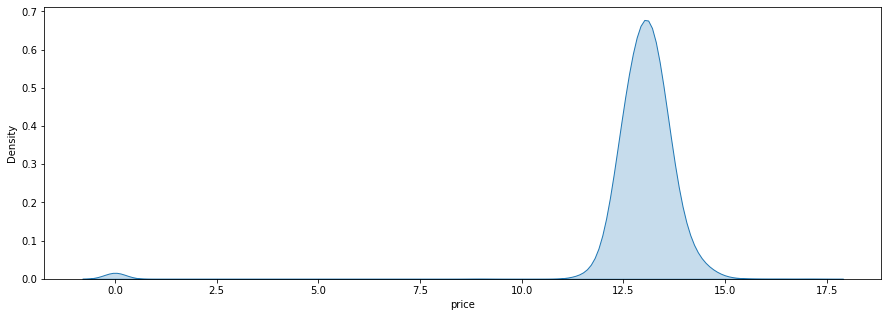

In [114]:
plt.figure(figsize=(15, 5))
sns.kdeplot(house_data['price'].apply(np.log1p), fill=True)
plt.show()

### Handling Outliers 

In [115]:
# Function to create Z-Score
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x, y, discrete_features=discrete_features, random_state=42)
    mi_score = pd.Series(mi_score, name='Mutual Information Score', index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [116]:
X = house_data.drop(columns=['price'])
y = house_data[['price']]

mi_score = make_mi_score(X, y)
mi_score

street           1.187259
statezip         0.453802
city             0.315389
sqft_living      0.298434
sqft_above       0.200396
bathrooms        0.184815
sqft_lot         0.145104
bedrooms         0.080524
yr_built         0.075527
floors           0.053934
view             0.050866
sqft_basement    0.046252
yr_renovated     0.011067
waterfront       0.005997
date             0.005088
condition        0.001126
country          0.000000
Name: Mutual Information Score, dtype: float64

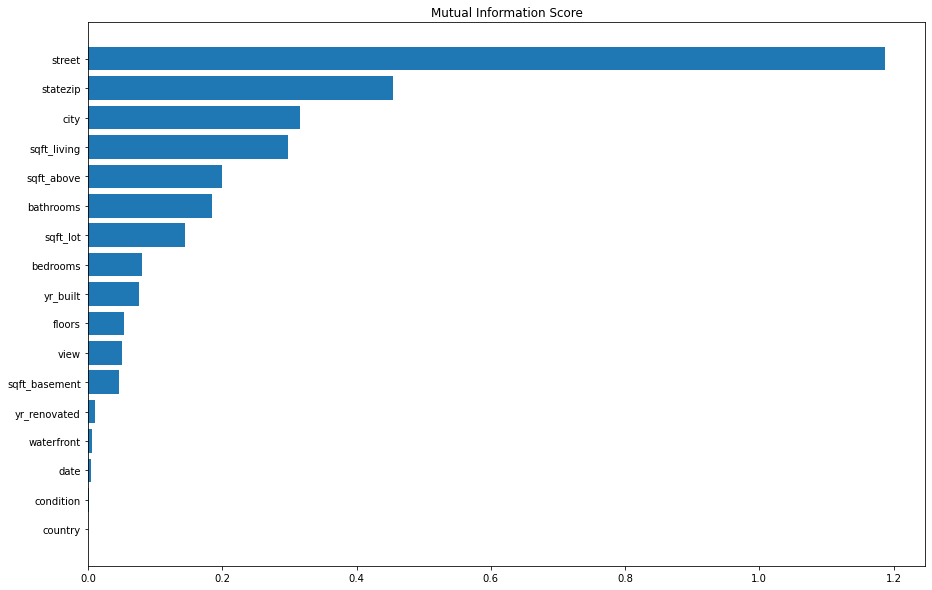

In [117]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.figure(figsize=(15, 10))
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(mi_score)

### Choosing attributes based on importance 

In [118]:
house_data = house_data[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'yr_built', 'sqft_lot', 'bedrooms', 'floors', 'sqft_basement']]

In [119]:
house_data.head()

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms,floors,sqft_basement
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0,1.5,0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0,2.0,280
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0,1.0,0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0,1.0,1000
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0,1.0,800


### Z scores of the given data 

In [120]:
z = np.abs(stats.zscore(house_data[['sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms','floors','sqft_basement']]))

In [121]:
z.head()

,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms,floors,sqft_basement
0,0.829971,0.565224,0.843204,0.531014,0.193434,0.441122,0.022416,0.672464
1,1.568528,1.789559,0.432802,1.674693,0.161718,1.759705,0.906555,0.069128
2,0.217367,0.119171,0.205201,0.161000,0.080978,0.441122,0.951388,0.672464
3,0.144686,0.959621,0.113800,0.261913,0.190145,0.441122,0.951388,1.482306
4,0.206984,0.797222,0.432802,0.175376,0.121306,0.659291,0.951388,1.051352


### Threshold value is set to 3 
### Data below threshold value are discarded 

In [122]:
house_data = house_data[(z < 3).all(axis=1)]

In [123]:
house_data.shape

(4408, 11)

In [125]:
house_data = house_data.join(y)

In [126]:
house_data.head()

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms,floors,sqft_basement,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0,1.5,0,313000.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0,2.0,280,2384000.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0,1.0,0,342000.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0,1.0,1000,420000.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0,1.0,800,550000.0


### Separating features and target 

In [127]:
X = house_data.drop(['price'], axis=1)
y = house_data['price']

### Encoding the string columns to numeric values

MEstimateEncoder - Encodes the columns by building relationship with the target

In [139]:
encoder = MEstimateEncoder(cols=['street','statezip','city'], m=0.5)

X = encoder.fit_transform(X, y)

### Splitting Training and Testing data 

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

## Model Evaluation 

### Linear Regression

In [142]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 111773121.815956
R-squared score: 0.9995717066101539


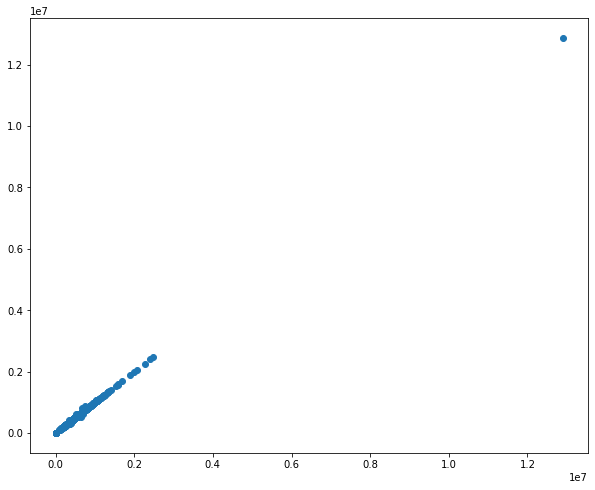

In [148]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test,y_pred)
plt.show()